In [6]:
# !pip install kaggle
# !pip install kagglehub

In [7]:
# import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("sarthakkapaliya/amazon-product-length-prediction-dataset")

# print("Path to dataset files:", path)

I have used a LSTM model to predict the length od the box 
the model does not gives very good result but i will i am trying to improve its performance

In [ ]:
import pandas as pd
import numpy as np

In [4]:
# sample_sub=pd.read_csv('/home/gesture-queen/VSCode/LSTMBoxPrediction/dataset/sample_submission.csv')
test_df=pd.read_csv('/home/gesture-queen/VSCode/LSTMBoxPrediction/dataset/test.csv')
train_df=pd.read_csv('/home/gesture-queen/VSCode/LSTMBoxPrediction/dataset/train.csv')

In [5]:
# print(test.sample(10))
print(len(test_df))
test_df.isnull().sum()

734736


PRODUCT_ID              0
TITLE                   5
BULLET_POINTS      275926
DESCRIPTION        380001
PRODUCT_TYPE_ID         0
dtype: int64

In [6]:
# print(train.sample(10))
print(len(train_df)) 
train_df.isnull().sum()

2249698


PRODUCT_ID               0
TITLE                   13
BULLET_POINTS       837366
DESCRIPTION        1157382
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [7]:
train_df=train_df.dropna()

In [8]:
x=train_df[['BULLET_POINTS','DESCRIPTION','PRODUCT_ID']]
y=train_df['PRODUCT_LENGTH']

In [9]:
print(x.head(10))
x.shape

                                        BULLET_POINTS  \
2   [Loud Dual Tone Trumpet Horn, Compatible With ...   
3   [Made By 95%cotton and 5% Lycra which gives yo...   
5   [Simple and elegant, great for displaying indo...   
7   [HIGH QUALITY PVC MATERIAL: The kitchen alumin...   
9   [100% Pure And Natural Essential Oil Or Fragra...   
10  [Good quality and Suitable to use.,This Produc...   
14  [Segovia bottle consists of stainless steel wh...   
21  [❤【Compatible mode】:This mobile phone case is ...   
25  [Completed Natural & Herbal.,Fragrances:- Rose...   
27  [Gemstone: Amethyst: Amethyst is a well known ...   

                                          DESCRIPTION  PRODUCT_ID  
2   Specifications: Color: Red, Material: Aluminiu...     2765088  
3   AISHAH Women's Lycra Cotton Ankel Leggings. Br...     1594019  
5   HINS Brings you the most Elegant Looking Pot w...     2152929  
7   <p><strong>Aluminum Foil Stickers-good kitchen...     2026580  
9   Transform your home, workpla

(1038458, 3)

In [10]:
y.head(10)
y.shape

(1038458,)

# Removing
### 1.Punctuation Mark
### 2.Short foem of complete form
### 3.replacing'-',()
### 4.spelling check

In [11]:
x['BULLET_POINTS'][3]

'[Made By 95%cotton and 5% Lycra which gives you 4 ways stretchable comfort, GSM 180 to 190,Come with Elasticized Waist Band, Slim Fit,Bubble free fabric and High quality steaching, Bio Wash,Skin-friendly fabric,ANKLE LENGTH LEGGINGS PACK OF 2]'

In [12]:
# converting to lower case
x['DESCRIPTION'] = x['DESCRIPTION'].str.lower()
x['BULLET_POINTS'] = x['BULLET_POINTS'].str.lower()

/tmp/ipykernel_6104/3577375439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['DESCRIPTION'] = x['DESCRIPTION'].str.lower()
/tmp/ipykernel_6104/3577375439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['BULLET_POINTS'] = x['BULLET_POINTS'].str.lower()


In [13]:
x=x[:458]
y=y[:458]
x.shape,y.shape

((458, 3), (458,))

In [14]:
#REMOVING THE the html tags
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

x['DESCRIPTION']=x['DESCRIPTION'].apply(remove_html_tags)
x['BULLET_POINTS']=x['BULLET_POINTS'].apply(remove_html_tags)

In [15]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

x['BULLET_POINTS']=x['BULLET_POINTS'].apply(remove_emoji)
x['DESCRIPTION']=x['DESCRIPTION'].apply(remove_emoji)


In [16]:
x['DESCRIPTION'][7],x['BULLET_POINTS'][21]

("aluminum foil stickers-good kitchen helper for mom and wife.&nbsp;specification: &nbsp;-materials: high-quality pvc &nbsp;-size: 2 mt&nbsp;-color: silver &nbsp;-friendly note: please buy enough rolls at a time to make sure that these wallpaper comes from the same batch to avoid color difference. &nbsp;-this aluminum foil stickers can be used for any dry, clean and smooth surface.&nbsp;features: &nbsp;1.high temperature resistant material is suitable for kitchen, which resists temperatures up to 250 celsius. it can be used for a long time and will not deform. &nbsp;2.easily to cut up: a grid line in square on the back, easy for you get the size you need when you cut.&nbsp;how to use? &nbsp;1.before sticking the kitchen oil proof wallpaper, please clean and dry surface with mild soap and water. make sure that surface is flat and without any carve. &nbsp;2.just cut out the size you want. &nbsp;3.use dishcloth or card to remove any air bubbles.&nbsp;package included: &nbsp;1 × kitchen ba

In [17]:
# converting short to normal forms of english
def custom_normalize(text):
    replacements={"can't": "cannot",
                "won't": "will not",
                "aren't": "are not",
                "couldn't": "could not",
                "didn't": "did not",
                "doesn't": "does not",
                "don't": "do not",
                "hadn't": "had not",
                "hasn't": "has not",
                "haven't": "have not",
                "isn't": "is    not",
                "mustn't": "must not",
                "shouldn't": "should not",
                "wasn't": "was not",
                "weren't": "were not",
                # "wouldn't":    "would not",
                "I'm": "I am",
                "I've": "I have",
                "I'd": "I would",
                "I'll": "I will",
                "you're": "you are",
                "you've": "you have",
                "you'd": "you would",
                "you'll": "you will",
                "he's": "he is",
                "he's": "he has",
                "he'd": "he would",
                "he'll": "he will",
                "she's": "she is",
                "she's": "she has",
                "she'd": "she would",
                "she'll": "she will",
                "it's": "it is",
                "it's": "it has",
                "it'll": "it will",
                "we're": "we are",
                "we've": "we have",
                "we'd": "we would",
                "we'll": "we will",
                "they're": "they are",
                "they've": "they have",
                "they'd": "they would",
                "they'll": "they will",
                "that's": "that is",
                "that's": "that has",
                "there's": "there is",
                "there's": "there has",
                "there're": "there are",
                "where's": "where is",
                "what's": "what is",
                "what's": "what has",
                "let's": "let us",
                "won't": "will not",
                "can't": "cannot",
                "shan't": "shall not",
                "ain't": "am not/are not/is not/has not/have not/had not",
                "could've": "could have",
                "might've": "might have",
                "must've": "must have",
                "should've": "should have",
                "would've": "would have",
                "could've": "could have",
                "might've": "might have",
                "must've": "must have",
                "should've": "should have",
                "would've": "would have",
                "I'ma": "I am going to",
                "gonna": "going to",
                "wanna": "want to",
                "gotta": "got to/have got to",
                "kinda": "kind of",
                "sorta": "sort of",
                "lotta": "lot of",
                "outta": "out of",
                "boutta": "about to",
                "y'all": "you all",
                "ain't": "am not/are not/is not/has not/have not/had not",
                "could've": "could have",
                "might've": "might have",
                "must've": "must have",
                "should've": "should have",
                "would've": "would have",
                "could've": "could have",
                "might've": "might have",
                "must've": "must have",
                "should've": "should have",
                "would've": "would have",
                "I'ma": "I am going to",
                "gonna": "going to",
                "wanna": "want to",
                "gotta": "got to/have got to",
                "kinda": "kind of",
                "sorta": "sort of",
                "lotta": "lot of",
                "outta": "out of",
                "boutta": "about to",
                "y'all": "you all",
                "ain't": "am not/are not/is not/has not/have not/had not",
                "could've": "could have",
                "might've": "might have",
                "must've": "must have",
                "should've": "should have",
                "would've": "would have",
                "could've": "could have",
                "might've": "might have",
                "must've": "must have",
                "should've": "should have",
                "would've": "would have",
                "I'ma": "I am going to",
                "gonna": "going to",
                "wanna": "want to",
                "gotta": "got to/have got to",
                "kinda": "kind of",
                "sorta": "sort of",
                "lotta": "lot of",
                "outta": "out of",
                "boutta": "about to",
                "y'all": "you all",
                "%":" percent "}
    for short_form,full_form in replacements.items():
        text=text.replace(short_form,full_form)
    return text

x['DESCRIPTION']=x['DESCRIPTION'].apply(lambda x: custom_normalize(x))
x['BULLET_POINTS']=x['BULLET_POINTS'].apply(lambda x: custom_normalize(x))

In [18]:
x['DESCRIPTION'][3],x['BULLET_POINTS'][3]

("aishah women's lycra cotton ankel leggings. brand: alishah length: ankel length leggings. size chart medium: 28 - 30 inch large: 30 - 32 inch x-large: 32 - 34 inch 2x-large: 34 - 38 inch the color fade will not be there in washing. this cotton stretch leggings is designed to provide absolute comfort and body fit. pair it with short or long kurta for modern look. high on style, fit and finish, this leggings is sure to lend you a sophisticated look. please wash the dark colors separately in order to improve the product life. disclaimer: product color may slightly vary due to photographic lighting sources or your monitor settings. please order according to your waist size mentioned in size chart",
 '[made by 95 percent cotton and 5 percent  lycra which gives you 4 ways stretchable comfort, gsm 180 to 190,come with elasticized waist band, slim fit,bubble free fabric and high quality steaching, bio wash,skin-friendly fabric,ankle length leggings pack of 2]')

In [19]:
# removing punctuation mark
import string
exclude=string.punctuation
import pandas as pd

def remove_punc_safe(text, exclude):
    if isinstance(text, str):
        for char in exclude:
            text = text.replace(char, '')
    return text

# Apply the function to your columns
x['DESCRIPTION'] = x['DESCRIPTION'].apply(lambda x: remove_punc_safe(x, exclude))
x['BULLET_POINTS'] = x['BULLET_POINTS'].apply(lambda x: remove_punc_safe(x, exclude))

In [20]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

x['BULLET_POINTS']=x['BULLET_POINTS'].apply(remove_url)
x['DESCRIPTION']=x['DESCRIPTION'].apply(remove_url)

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer()

2025-03-16 22:43:43.885241: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 22:43:43.904207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742145223.922662    6104 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742145223.926554    6104 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742145223.936604    6104 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [22]:
x['text']=x['BULLET_POINTS'] +" "+ x['DESCRIPTION']
x['text'][3]

'made by 95 percent cotton and 5 percent  lycra which gives you 4 ways stretchable comfort gsm 180 to 190come with elasticized waist band slim fitbubble free fabric and high quality steaching bio washskinfriendly fabricankle length leggings pack of 2 aishah womens lycra cotton ankel leggings brand alishah length ankel length leggings size chart medium 28  30 inch large 30  32 inch xlarge 32  34 inch 2xlarge 34  38 inch the color fade will not be there in washing this cotton stretch leggings is designed to provide absolute comfort and body fit pair it with short or long kurta for modern look high on style fit and finish this leggings is sure to lend you a sophisticated look please wash the dark colors separately in order to improve the product life disclaimer product color may slightly vary due to photographic lighting sources or your monitor settings please order according to your waist size mentioned in size chart'

In [23]:
y.shape

(458,)

In [24]:
x = x['text']
x.shape

(458,)

In [27]:
all_texts = x.to_numpy()
all_texts

array(['loud dual tone trumpet horn compatible with sx4electric air horn with compressor compatible with sx4high quality high intensity horn sound compatible with sx4color red compatible with sx4professional installation required compatible with sx4 specifications color red material aluminium voltage 12v db 130 db around material aluminum pump head  steel pump body  abs shell and parts db output 130db voltage 12v sound type dual tone application 12v voltage vehicles with battery above 20a package included 1 x dual tone air horn compatible with sx4',
       'made by 95 percent cotton and 5 percent  lycra which gives you 4 ways stretchable comfort gsm 180 to 190come with elasticized waist band slim fitbubble free fabric and high quality steaching bio washskinfriendly fabricankle length leggings pack of 2 aishah womens lycra cotton ankel leggings brand alishah length ankel length leggings size chart medium 28  30 inch large 30  32 inch xlarge 32  34 inch 2xlarge 34  38 inch the color fade

In [28]:
# Fit the tokenizer on this list
tokenizer.fit_on_texts(all_texts)

In [29]:
print(len(tokenizer.word_index))
tokenizer.word_index

11641


{'and': 1,
 'the': 2,
 'to': 3,
 'for': 4,
 'of': 5,
 'a': 6,
 'with': 7,
 'is': 8,
 'your': 9,
 'in': 10,
 'you': 11,
 'it': 12,
 'are': 13,
 'this': 14,
 'or': 15,
 'from': 16,
 'on': 17,
 'can': 18,
 'be': 19,
 'will': 20,
 'quality': 21,
 'made': 22,
 'size': 23,
 'not': 24,
 'as': 25,
 'that': 26,
 'all': 27,
 'design': 28,
 'material': 29,
 'easy': 30,
 'our': 31,
 'any': 32,
 'case': 33,
 'cover': 34,
 'use': 35,
 'has': 36,
 'by': 37,
 'percent': 38,
 'x': 39,
 'perfect': 40,
 'which': 41,
 'back': 42,
 'high': 43,
 'we': 44,
 'product': 45,
 'soft': 46,
 'color': 47,
 '1': 48,
 'an': 49,
 'these': 50,
 'durable': 51,
 'have': 52,
 'phone': 53,
 'fit': 54,
 'style': 55,
 'at': 56,
 'make': 57,
 'comfortable': 58,
 'gift': 59,
 'also': 60,
 'home': 61,
 'fabric': 62,
 'wear': 63,
 'please': 64,
 'more': 65,
 'water': 66,
 'designed': 67,
 'great': 68,
 'used': 69,
 'up': 70,
 'no': 71,
 'look': 72,
 'car': 73,
 '2': 74,
 'long': 75,
 'best': 76,
 'keep': 77,
 'hand': 78,
 'provi

In [ ]:
tokenized_sentence=[]
for sentence in all_texts:
  tokenized_sentence.append(tokenizer.texts_to_sequences([sentence])[0])

In [34]:
len(tokenized_sentence[20])

60

In [33]:
len(all_texts)

458

In [36]:
#as the supervised learning algos expect the same size of input so we will do zero_padding
max_length=max([len(x) for x in tokenized_sentence])  #max length for padding
max_length

576

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences=pad_sequences(tokenized_sentence,maxlen=max_length,padding='pre')

In [39]:
padded_input_sequences.shape,y.shape

((458, 576), (458,))

In [41]:
#creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import Reshape
from sklearn.metrics import r2_score

In [48]:
model=Sequential()
model.add(Embedding(88636,200,input_length=507))
model.add(LSTM(256,return_sequences=True))
model.add(LSTM(256))
model.add(Dense(1,activation='linear'))

/home/gesture-queen/VSCode/LSTMenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae', RootMeanSquaredError()])

In [50]:
model.build((None,507))  
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 507, 200)       │    17,727,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 507, 256)       │       467,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,720,737 (71.41 MB)

 Trainable params: 18,720,737 (71.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(padded_input_sequences,y,epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 908ms/step - loss: 7866974.5000 - mae: 1341.0807 - root_mean_squared_error: 2778.4368
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 899ms/step - loss: 8992107.0000 - mae: 1366.7565 - root_mean_squared_error: 2960.4695
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 890ms/step - loss: 6103508.0000 - mae: 1279.8490 - root_mean_squared_error: 2455.3530
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 961ms/step - loss: 6993776.5000 - mae: 1299.3275 - root_mean_squared_error: 2629.7351
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 964ms/step - loss: 5289294.5000 - mae: 1132.5137 - root_mean_squared_error: 2278.0122
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 944ms/step - loss: 6974827.5000 - mae: 1350.4115 - root_mean_squared_error: 2627.6260
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 956ms/step - loss: 7054084.5000 - mae: 1306.7607 - root_mean_squared_error: 2648.1990
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 928ms/step - loss: 6596416.0000 - mae: 1244.8137 - roo

In [54]:
test_df

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
5,2782548,Evershine Shoppee 10m Waxed Nylon Thread Cotto...,[Kindly Refer The Product Description Before B...,Description: Material: Nylon Length: about 10m...,11205
11,2736605,SHASAK Sanganer Hand Block Printed Short Kurta...,[Confused between wearing a T-shirt and a shir...,Men’s Pure Cotton Sanganeri Hand-Block Print S...,2911
...,...,...,...,...,...
734728,1805278,E RELAX Arm Blaster-Heavy Duty Padded Thick Ga...,"[We offer you quality material, durable straps...",E RELAX arm blaster is made from superior grad...,12955
734731,921419,"Casual Canine Basic Hoodie for Dogs, 16"" Mediu...",[Brightly colored pet sweatshirts with authent...,"ZA6015 16 43 Size-See Chart Below: Medium: 16""...",7073
734733,841529,Axor 39135001 Citterio Widespread Faucet with ...,"[8-Inch centers,1/2-Inch IPS inlets,9-Inch spo...",39135001 Features: -ADA compliant. -Includes p...,10645
734734,1190194,Caroline's Treasures BB1801DS812 Halloween Bas...,"[Indoor or outdoor aluminum artwork prints,8 i...",Features. Great for inside or outside these Al...,12680


In [55]:
#preprocessing the test daat
test_df=test_df.dropna()

x_test=test_df[['BULLET_POINTS','DESCRIPTION']]

# converting to lower case
x_test['DESCRIPTION'] = x_test['DESCRIPTION'].str.lower()
x_test['BULLET_POINTS'] = x_test['BULLET_POINTS'].str.lower()
x_test=x_test[:458]
x_test.shape

#REMOVING THE the html tags
x_test['DESCRIPTION']=x_test['DESCRIPTION'].apply(remove_html_tags)
x_test['BULLET_POINTS']=x_test['BULLET_POINTS'].apply(remove_html_tags)

x_test['BULLET_POINTS']=x_test['BULLET_POINTS'].apply(remove_emoji)
x_test['DESCRIPTION']=x_test['DESCRIPTION'].apply(remove_emoji)


# converting short to normal forms of english
x_test['DESCRIPTION']=x_test['DESCRIPTION'].apply(lambda x: custom_normalize(x))
x_test['BULLET_POINTS']=x_test['BULLET_POINTS'].apply(lambda x: custom_normalize(x))

# Apply the function to your columns
x_test['DESCRIPTION'] = x_test['DESCRIPTION'].apply(lambda x: remove_punc_safe(x, exclude))
x_test['BULLET_POINTS'] = x_test['BULLET_POINTS'].apply(lambda x: remove_punc_safe(x, exclude))

x_test['BULLET_POINTS']=x_test['BULLET_POINTS'].apply(remove_url)
x_test['DESCRIPTION']=x_test['DESCRIPTION'].apply(remove_url)

x_test['text']=x_test['BULLET_POINTS'] +" "+ x_test['DESCRIPTION']
x_test['text'][3]

x_test= x_test['text']
x_test.shape

all_texts_test = x_test.to_numpy()
all_texts_test

# Fit the tokenizer on this list
tokenizer.fit_on_texts(all_texts_test)

print(len(tokenizer.word_index))
tokenizer.word_index


tokenized_sentence_test=[]
for sentence in all_texts_test:
  tokenized_sentence_test.append(tokenizer.texts_to_sequences([sentence])[0])
  
  #as the supervised learning algos expect the same size of input so we will do zero_padding
max_length_test=max([len(x) for x in tokenized_sentence_test])  #max length for padding
max_length_test

padded_input_sequences_test=pad_sequences(tokenized_sentence_test,maxlen=max_length_test,padding='pre')


/tmp/ipykernel_6104/43973821.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['DESCRIPTION'] = x_test['DESCRIPTION'].str.lower()


18662


/tmp/ipykernel_6104/43973821.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['BULLET_POINTS'] = x_test['BULLET_POINTS'].str.lower()


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step
Sample predictions:
Sample 0: Predicted box length = 348.31
Sample 1: Predicted box length = 348.31
Sample 2: Predicted box length = 348.31
Sample 3: Predicted box length = 348.31
Sample 4: Predicted box length = 348.31
Sample 5: Predicted box length = 348.31
Sample 6: Predicted box length = 348.31
Sample 7: Predicted box length = 348.31
Sample 8: Predicted box length = 348.31
Sample 9: Predicted box length = 348.31

Prediction Statistics:
Mean predicted box length: 348.31
Median predicted box length: 348.31
Min predicted box length: 348.31
Max predicted box length: 348.31
Standard deviation: 0.00


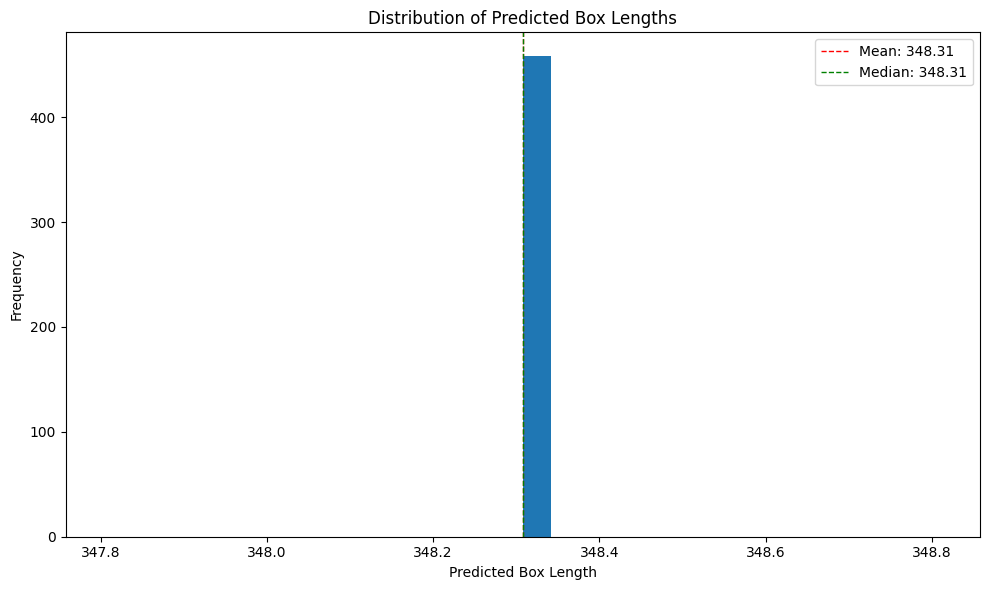

In [59]:
# Get predictions
predictions = model.predict(padded_input_sequences_test)

# Convert predictions to appropriate format if needed (e.g., flatten if they're in a nested array)
predictions = predictions.flatten()

# Display some sample predictions
print("Sample predictions:")
for i in range(min(10, len(predictions))):
    print(f"Sample {i}: Predicted box length = {predictions[i]:.2f}")

# Basic statistics of predictions
print("\nPrediction Statistics:")
print(f"Mean predicted box length: {np.mean(predictions):.2f}")
print(f"Median predicted box length: {np.median(predictions):.2f}")
print(f"Min predicted box length: {np.min(predictions):.2f}")
print(f"Max predicted box length: {np.max(predictions):.2f}")
print(f"Standard deviation: {np.std(predictions):.2f}")

# Visualize prediction distribution
plt.figure(figsize=(10, 6))
plt.hist(predictions, bins=30)
plt.xlabel('Predicted Box Length')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Box Lengths')
plt.axvline(np.mean(predictions), color='r', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(predictions):.2f}')
plt.axvline(np.median(predictions), color='g', linestyle='dashed', linewidth=1, label=f'Median: {np.median(predictions):.2f}')
plt.legend()
plt.tight_layout()
plt.show()

TypeError: unsupported type: <class 'numpy.ndarray'>

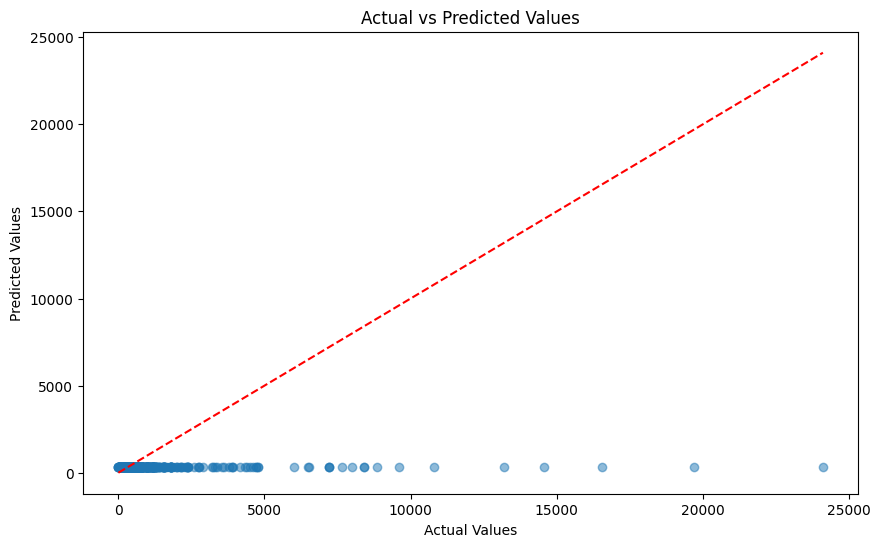

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(y, y_pred, alpha=0.5)

# Add a perfect prediction line (y=x)
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add correlation coefficient
correlation = y.corr(y_pred)
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy=(0.05, 0.95), 
             xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray"))

# Add legend and show plot
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()